# Data Mining

Originally a statistical term of art for overusing data to draw invalid inferences

*"Bonferroni's theorem tells us that if there are many possible conclusions to draw, some of them will be true statistical reasons with no physical validity"*

## Data mining, the original meaning
<img src="https://imgs.xkcd.com/comics/significant.png" width="250" height="250" />


## Thoughts on the need for data-mining

*"Drowning in Data yet Starving for Knowledge"* - unknown 

*"Computers have promised us a fountain of wisdom but delivered a flood of data"* - William J. Frawley, Gregory Piatetsky-Shapiro, and Christopher J. Matheus

*"Where is the wisdom we have lost in knowledge? Where is the knowledge we
have lost in information?"* - T.S Eliot
<img src="http://www.ncbi.nlm.nih.gov/core/assets/genbank/images/genbankgrowth.jpg" width="250" height="250" />


## What Data Mining isn't: 

<s> *Data Mining, noun: “Torturing data until it confesses ... and if you torture it
enough, it will confess to anything”* </s>

<s> *"An Unethical Econometric practice of massaging and manipulating the data to
obtain the desired results*" </s>

Times change and words change with the times. (*Tempora mutantur, nos et mutamur in illis*, more or less)


## Current Day Examples of Data Mining

* Traveler patterns studied/analysed to manage the sale of discounted seats/hotel rooms rooms. 

* The connection between diapers and beer. From the user of data mining it was observed that customers who buy diapers are more likely to by beer than average. Supermarkets then placed beer and diapers nearby, knowing many customers would walk between them. Placing potato chips between diapers and beer increased sales of all three items.

* Skycat and Sloan Digital Sky Survey - clustering sky objects by their radiation levels in different bands allowed astromomers to distinguish between galaxies, nearby stars,and many other kinds of celestial objects.

* Comparison of the genotype of people with/without a condition allowed the discovery of a set of genes that together account for many cases of diabetes. This sort of mining will become much more important as the human genome is constructed.

## Big data tolls for thee

<img src="http://i.imgur.com/gGs5f1d.png" width="300" height="400" />


## The Component Fields of data mining

* Statistics
* Mathematics
* Artifical Intelligence (*machine learning*)
* Visualization
* Information/Database sciences


## Stages of data mining
* <s>Denial</s> Data gathering (data warehousing, web crawling, semi-legal metadata collection)
* Data cleansing (elimating errors, corrupted data, unphysical outliers)
* Feature extraction (obtaining only the interesting attributes of the data; i.e. timestamp for data that has no reason to be time-dependent)
* Pattern extraction/discovery (the classical "data-mining" step)
* Visualization
* Evaluation of the results (not every discovered fact is useful or true.)
  * Use you judgement
  
<img src="http://sparrowism.soc.srcf.net/home/piratesarecool4.gif" width="400" height="300" />
  

# Clustering
* Clustering strives to indetify groups/clusters of objects that behave similarly/or have similar characteristics. 

*Similarity is ofter quantified via some sort of distance function. 

* Has different names in different contexts 
  * Segmentation method (market studies)
  * Unsupervised learning (neural network studies)

* Cluster is a technique which attempts to find order in apparently unordered data. 
  * Data may be discrete or continuous. 
  
We'll look at three types of clustering
 * Hierarchical clustering
 * K-means clustering
 * geometric clustering
  

## Hierarchical Clustering

Clustering data points based on a tree-like hierarchical relationships 

In **agglomerative hierarchical clustering**, the data is grouped in a bottom up fashion; every data point starts out as a cluster of 1, then you begin grouping similar objects. 

The opposite approach is **divisive hierarchical clustering**; everything start outs in the same cluster, then you begin breaking off clusters based on differences. 

**The most important concept for clustering is how you quantify "similarness" of two different data points. Often times this will be a "distance" in some space.**

Different clustering methods define this distance in different ways. 

## Measures of Distance

Natural concept for data points in physical space (x,y,z); use Euclidean distance formula. 

There are other ways of doing it as well (infinity norm / max norm) 

In stating the distance between two objects, you need to define your distance. 

Often, our objects are not in Euclidean space (colors in an image, amino acid codons, etc...), yet we still need to quantify the distance between them. 


## Measures of Distance

Let $A,\ B$ and $C$ be clusters (which may consist of a single or multiple objects). WE denote the distance between $A$ and $B$ as $d(A,B)$ where $d(\cdot,\cdot)$ satisfies the following general properties by definiton. 

1. $d(A,A) = 0$
2. $d(A,B) = d(B,A)$
3. $d(A,B) \ge 0$
4. $d(A,B) + d(B,C) \le d(A,C)$ 

If you decide on the Euclidean norm (or any vector norm), measuring the distance between two single objects is relatively simple; but how do define the distance between two groups of objects

* Nearest neigbhor, furthest, average, centroid

### Measures of distance example:

Imagine we have two words we want to quantify the distance between; You can define a path from the first word to the second word by changing one letter at a time to make another word (a legal word (scrabble legal)). 

Lets look at an example of the distance between GOLF and WORD

GOLF $\rightarrow$ GOLD $\rightarrow$ COLD $\rightarrow$ CORD $\rightarrow$ WORD

The distance in this metric is 4, for GOLF and WOLF it would be 1. 

This metric satisfies all of our neccesary properties of a distance. 


# Agglomerative Hierachical Clustering

Bottoms up grouping of objects. 

Starting with N objects we want to cluster, we let each object initially be it's own cluster. This gives us N clusters. 

Our first step is to pick the two closest (however we define it) clusters (objects in this first step) and form a cluster with them. We now have N-1 clusters and now record that in the first step,  clusters i and j were merged. 

Our second step, we again merge the two closest clusters. This may involve merging our two object cluster with a third, or merging two individial objects for a new cluster. 

We continue until we have a single cluster, or a user specified number of clusters. 

How do we define distance between one object, and a cluster of multiple objectss?

## Single Linkage Hierarchial Clustering

This clustering technique makes a specific choice for determining closeness between clusters; the distance between two clusters is the distance between the closest elements in the two clusters. 

<img src="http://i.imgur.com/AqylMZc.png" width="300" height="400" />


## SLHC
If $A$ consists of #n# objects $\alpha_i$ and $B$ consists of $m$ objects $\beta_j$, then the distance between $A$ and $B$ would be given as 

$$ d(A,B) = \min(d(\alpha_i,\beta_j)) \text{ for } i=1,n, j =1,m$$

The distance between all possible object pairs is computed, and the the minimum value of these is said to be the distance between clusters A and B. 

### Clustering in Python 
Lets initalize some stuff first. 

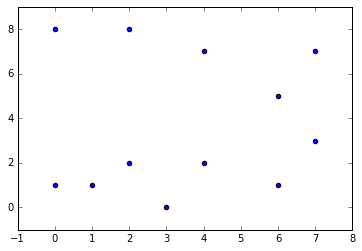

In [1]:
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
%matplotlib inline
np.set_printoptions(precision=5, suppress=True) 
a = [[3,0], [0,1], [1,1], [6,1], [2,2], [4,2], [7,3], [6,5], [4,7], [7,7], [0,8], [2,8]]

a = np.asarray(a)
plt.scatter(a[:,0], a[:,1])
plt.show()


### Clustering in Python
Now lets do some clustering

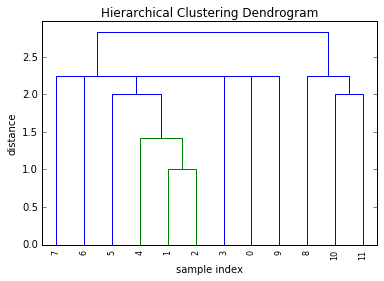

In [2]:
Z = linkage(a, 'single', 'euclidean')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
t = dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)


### Clustering in Python

<img src="http://i.imgur.com/pY1IX6Z.png" width="500" height="500" />

Single linkage clustering tends to cluster items due to one outlier in a cluster grabing vaguely close points. We can avoid this with complete linkage clustering. 


## Completed Linkage Hierarchical Clustering 

The opposite of SLHC. 
Looks at the maximum distance between objects in two clusters. 
$$ d(A,B) = \max(d(\alpha_i,\beta_j)) \text{ for } i=1,n, j =1,m$$

At each step, the two clusters with the minimalist maximum distance are clustered. 

<img src="http://i.imgur.com/aRDJwAC.png" width="400" height="400" />


### CLHC in Python

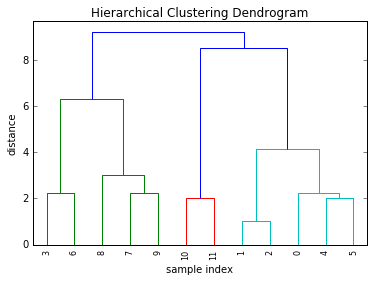

In [3]:
### CLHC in Python
Z = linkage(a, 'complete', 'euclidean')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
t = dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

## Other Hierachical clusterings 

* Average linkage hierarchical clustering
  * $d(A,B) = \frac{1}{mn} \sum_{i=1}^n\sum_{j=1}^m d(\alpha_i, \beta_j)$
  
* Centroid linkage hierarchical clusterings
  * $d(A,B) = ||\bar\alpha-\bar\beta||_2$
  
  $$\bar\alpha= \frac{1}{n}\sum_{i=1}^n \alpha_i$$


## Hierarchical Clustering Utility
Hierachical Clustering is useful when the data is thought to have a family/evolutionary relationship

Clusters/Subclusters formed based on degree of similarity

Not useful if there is no reason to assume a hierarchy. 

## K-Means Clustering

K-Means clustering looks for K average values about which the data can be clustered. 

We are not as interested in finding a family history but rather breaking our
data into K groups.

Example: 435 House Congressional districts to be formed. 

Need to quantify these averages and energies in order to implement. 


## Averages/Energy Function

Averages are often used as a measure of center for a set of data; a single number to represent a set of numbers. We can quantify this more rigorously/mathematically as follows: 

Let $\bar x$ be the average of the set $X = \{x_1, x_2, \ldots x_n\}$, Then $\bar x$ is the unique number which minimizes the energy function

$$\mathcal{E}(c,X) = \frac{1}{2}\sum_{i=1}^n(c-x_i)^2$$

Which is to say 

$$ \bar x = \min_{c\in\mathcal{R^1}}\frac{1}{2}\sum_{i=1}^n(c-x_i)^2$$

How do we prove this?

## Averages/Energy Function

Take the derivative of the energy function with regard to c, and set it to 0, solve for c. 

$$\frac{\partial\mathcal{E}(c,X)}{\partial c} = \frac{1}{2}\sum_{i=1}^n2(c-x_i)=0$$

$$ \sum_{i=1}^n c = \sum_{i=1}^n x_i$$

$$c = \frac{1}{n}\sum_{i=1}^n x_i$$

## K-means and the energy function

Now that we view an average as the minimum of an energy function, we can generalize the concept and use it to form a procedure for K-means clustering.

Assume we have a set of $K$ centers, $c_j$, and you have more than one "average". We want to divide the data into $K$ clusters $C_j$ and find the points $c_j$ such that the energy function:

$$\mathcal{E} = \sum_{j=1}^K \Big[ \sum_{x_i \in C_j} ||c_j - x_i||_2^2\Big]$$

Is minimized. This is the basis of K-means clustering. 

## Clusters and Centers
<img src="http://i.imgur.com/RqtxXtR.png" width="400" height="400" />

Here we have 100 points and 5 random 'centers' $c_j$. We cluster the points by
determining which of the 5 'centers' each point is closest to. The problem is,
these points are not actual centers of the clusters and don’t minimize our energy.

## The K-means algorithm / LLoyd's method

Given a set of $N$ points in $\mathcal{R}^d,   X = \{\vec x_i\}^N_{i=1}$, we want to cluster this data into $K$ groups.

The goal is to find K points $c_j$ such that the energy 
$$\mathcal{E} = \sum_{j=1}^K \Big[ \sum_{x_i \in C_j} ||c_j - x_i||_2^2\Big]$$

is minimized. The cluster $C_j$ is the set of points in $X$ which are closer to $c_j$ than any other $c_i$

For the initializiation step, we choose K points called centers or generators and denote them by $\vec c_i$, $i=1,\ldots, K$. They can be random, but other approaches may be better depending on the problem. 

## The K-means algorithm

**Step 1:** For each point $\vec x_i$ , determine $\vec c_j$ such that
$$||x_x - c_j || \leq ||x_i-c_n||\text{ for all }n = 1, \ldots N$$

This is the clustering step. Every point gets associated with a single cluster. 

There is no expectation that these initial clusters will minimize our energy function. In fact, some clusters may be entirely empty (some values of $c_j$ may be associated with no points in $X$). 

So we now construct an iterative process were we move $c_i$ to the center of each cluster and start again. 

**Step 2:** Compute a new set of centers/generators such that

$$ c_j =\text{the average of all points in the }j\text{th cluster}$$

**Step 3:** Check for convergence. if not converged, go to step 1. 

## Evolution of K-means
<img src="http://i.imgur.com/oOi0IZi.png" width="600" height="600" />

In this example we have 10 points on [0, 10] × [0, 10]. The initial generators aredenoted by red circles and after 3 iterations, they have moved to the black circles. The blue points are in one cluster and the red points in another

## Evolution of K-means

<img src="http://i.imgur.com/lGwq8LR.png" width="600" height="600" />

This is our 100 points from a previous slide that have been clustered using KMeans

## Convergence of K-means

To gauge the quality of our clustering, we can look at the variance quantity that we have previously discussed. Recall that the variance of a set of points is given as. 

$$\text{var}(x) = \frac{1}{n} \sum_{i=1}^n(x_i - \bar x)^2$$

The variance can thus be thought of something like the average distance between your data points and their average. If a data set has a small variance, most of the data is close to the average. 

If we have multiple clusters for our data instead of a single average, the discrete cluster variance is defined as 
$$ \frac{1}{n_j} \sum_{x_i \in C_j} ||x_i - c_j||^2$$

## Convergence of K-Means

K-means converges because 
* Whenever a point is assigned to a new cluster, the sum of the squared distances of each point in the cluster to its assigned cluster center is reduced.

* Whenever a cluster center is moved the sum of the squared distances of thedata points from their currently assigned cluster centers is reduced. Thus the cluster variance is reduced.

* If points are no longer moved between clusters, then the algorithm has converged. 

Total cluster variance should be reduced at each iteration, but there is no guarantee to find the global minimum (the set of cluster centers that gives the lowest total energy over all possible sets of cluster centers). 





## K-means: Global vs Local minimum. 
<img src="http://i.imgur.com/oI9no54.png" width="600" height="600" />


## K-means: Global vs Local minimum. 

Some strategies to find the global minimum for a K-means problem

* Run the algorithm many different times with many different starting points and compute the energies fo each, selecting the set of centers corresponding to the smallest final energy in all these runs. 

* Use some prior information about your data to make a more intelligent choice for your initial generators than random. 

* Use quasi-random sampling to ensure a more uniform sampling your domain for your initial generator positions. 

## Implementing K-means

**Initalization step**: Set $k$, the number of clusters you wish to form, the input data to be clustered ($n$ records, $x_i$), and the maximum number of maximum iterations, and your initial generator points.


```
def KMeans(k,c_init,x,n,max_iter):
    c = cinit
    for nit in range(0,max_iter):
        for i = in range(0,n-1):
            find center c[j] which x[i] is closest to
            increment counter n[j] for number of data points in cluster C[j]
            increment sum of each coordinate of all points in cluster C[j]
        move centers c[j] by taking average of all points in C[j]
         
        check for convergence
         
        if (converged)
        break
```

## K-means algorithm implementation considerations

The main work each iteration is to finding the center each record is associated with. 
* For small problems, you'll likely take the brute force approach and just calculate the distance between every point and every center, and then just select the minimum. 

When to terminate the K-means algorithm

* Convergence is formally acheived when the cluster centers $c_j$ stop moving from one iteration to the next. For practical purposes, you can say that any cluster movement smaller than some tolerance indicates convergence for that cluster.
* When all cluster movement falls beneath that tolerance, total convergence is acheived and your algorithm can exit. 



## K-means algorithm for image compression
* If we have a color image we know that each pixel is represented by three RGB values creating a myriad of colors.

* Our your computer monitor you have essentially an unlimited number of colors ($256 ^ 3$)available but on a printer you have less. 

* We can use K-Means to accomplish this image compression. In the lab we will find which 32 colors best represent the image.

* To do this, we initiate our probabilistic Lloyd’s algorithm with k generators which are numbers between 0 and 255; we can simply choose the generators randomly

* In Lloyd’s algorithm we need to sample each record so in our application this means to sample the image; i.e., sample a random pixel. If the image is not too large, then we can simply sample every pixel in the image.

* We then proceed with the algorithm until convergence is attained.

* After convergence is achieved we know the best $k$  shades of gray to represent our image so our final step is to replace each color in our original matrix representation of the image with the converged centroid of the cluster it is in.



## K-Means image compression

<img src="http://i.imgur.com/ZL1Nkme.png" width="600" height="600" />


Original RGB image


## K-means image compression

<img src="http://i.imgur.com/u8Ldxxk.png" width="600" height="600" />


K-means compressed image with only 8 RGB colors

 # Weighted K-Means

# Classification Problems

The problem of assigning an object into one of a preselected group. 
Examples include 
* Classifying e-mails as spam or innocuous based on message header and content. 
* Classifying cells as benign or cancerous based on scan results
* Classifying galaxies (spiral, elliptical, irregular) based on their morphology.
* Classifying consumers as potential customers based on their purchase history. 

## Classification Terminology

Each record in a data set is known as an **instance** and is characterized by the **attribute set** $x$ and the **target attribute/class label** $y$

The classification problem is the problem of finding a target function $f$ that maps each attribute set $x$ to on of the predetermined class labels $y$. The target function is our classification model. 

Generally, you will use a training set to build a classification model. 

Classification models can be used for 

* Descriptive Modeling - serving as an explanatory tool to distinguish between objects of different classes

* Predictive Modeling - predicting the class labels for unknown records. 

## Attribute types

There are 4 types of attributes

* nominal : different names/labels (brown/blue/green for eye color)
* ordinal : ordered attribute (hot/mild/cold, or small/medium/large)
* interval: differences in values are meaningful (dates, temperature)
* ratio   : differences in ratios are meaninful (mass, age)

Attributes can be discrete or continuous. 

Discrete attributes can be nominal like zipcodes/SSN or just numerical. Binary attributes are a special case of attribute that are either true or not (married or unmarried, mammal, not mammal). They can be represented as a 0 and 1 an are often dubbed Boolean attributes. 

Continuous attributes have values which are real numbers (temperature, weight, salary). 

Classification techniques work best for data which is binary or nominal. Often times, continuous data is transformed into ordinal (from a salary value to high-income, middle-income, and low-income). 

## General Approach to Solving Classification Problems

The goal is to build a classification model from an existing set of data systematically. The model should both:

* Accurately Describe the Training Data
* Correctly predict the class labels of unseen records not in the training data. 

Techniques include:

* Decision tree classifiers
* rule-based classifiers
* neural networks
* support vector machies
* Bayes classifiers

Each technique uses a learning algorithm to indentify a model that best fits the relationship between the attribute set and the class label from training data. 



## Steps to the General Approach for Classification Problems

1. Provide a training set of data whose class labels are known.
2. Apply one of the techniques above to build a classification model using the training set. 
3. Apply the model to a test set of data to determine class labels. 
4. Evaluate the performance of the model based of the number of correct/incorrect predictions in the test set. Accuracy and error rate can be computed for these models. 

### Test Set Example

Consider the case where we have a classification model to classify records as either Class A or Class B, and using the model on the test set reveals the following results. 

| Actual Class  |A   | B   |
| ------------- |:--:| ---:|
| Class A       | 43 | 10  |
| Class B       | 12 | 35  |

Of the 100 records in the test set, 43 were correctly assigned to class A, 10 were incorrectly assigned to class A. 12 were incorrectly assigned to class B, and 35 were correctly assigned to class B. That gives us an accuracy of $78/100=78\%$, and an error rate of $22\%$. 

# Decision Tree Classifiers

The idea behind decision trees is to pose a series of questions about the characteristics we are interested in. The choice of questions is chosen carefully to develop to classification model. 

Example: Suppose we have a list of vertebrates and we want to classify them
as mammals or non-mammals. Below is a possible decision tree for classifying a
vertebrate. Note the following terminology:

* root node: no incoming edges and zero or more outgoing edges. 
* internal node: exactly one incoming edge and two or more outgoing edges
* leaf node: exactly one incoming and no outgoing edges

### Decision Tree Classifier Example

Suppose we want to use this tree to classify a penguin which has the following attributes. 
<img src="http://i.imgur.com/oWrpFcT.png" width="300" height="300" />

| name |body temp |gives birth  | class |
| ------------- |:--:| :---:| --------: 
| penguin       | warm blooded | no   | ?|


## Decision Tree Classifier Approach:

As there are exponentially many decision trees that can be constructed from a set of given attributes, so we are likely unable to find the single best decision tree; instead, we build our decision tree on the single best question we can ask right now. This is another example of a **greedy** algorithm. 

Recall that greedy algorithms are characterized by the fact that the choice at any given step fits the following two criteria:
* It is the best local choice available among all feasible choices available that step
* The choice is irrevocable

### Decision tree classifier example 2:
Suppose we want to build a decision tree to predict whether a person
will default on his/her car loan payments. We collect data from previous bor-
rowers and accumulate the following training set. The attributes we summarize
are: (i) homeowner (binary attribute), (ii) marital status (nominal/categorical), (iii) annual income (continuous ). Our target class label is binary and is whether that person defaults on the loan payments.


<img src="http://i.imgur.com/BSYqDIW.png" width="600" height="600" />


### Decision Tree Classifier Example: Hunt's Algorithm

Hunt's algorithm Builds a decision tree in a recursive manner; the records are subsequently divided into smaller subsets until the records belong to the same class. 

Step 0: Check to make sure all records in the training set don't all have the same value in the target attribute (defaulted in the above example). If you're building a classifying model, there needs to be differences in the target attribute. 

Step 1: Determine your question; for now we'll just ask them in order in the table, so we first check home ownership. We not that all three home owners did not default, so that is a leaf. However, some non-home owners defaulted and others didn't so we need to subdivide further. 

Step 2: Our second question/criteria will be marital status; here we note that all married borrowers repaid their loans so that is a leaf; however, not all single/divorced borrowers repaid, so we need to subdivide further. 

Step 3: Our  third criteria is annual income. The group of non-homeowners who
are single or divorced is divided by < 80K or > 80K. In this case the individuals making more than 80K defaulted and those making less did not.

### Decision Tree Classifier Example: Hunt's Algorithm

Resulting decision tree
<img src="http://i.imgur.com/xgiTRaF.png" width="600" height="600" />

Of course if we ask the questions in a different order we get a different decision

### Decision Tree Classifier Example: Hunt's Algorithm
<img src="http://i.imgur.com/Gj2zFHF.png" width="600" height="600" />


## Hunt's algorithm

Each step is recursive, in that we attempt to partition the training records into successively similar subsets. 

To describe the method more abstractly, let $y = \{y_1, y_2,\ldots, y_l\}$ be the class labels (default or didn't default in the abvoe example) and let $\mathcal{D}_i$ be the $i$th subset of the training set associated with node $i$ (either leaf, root, or internal node)

The algorithm then 

Checks to see if all records in $\mathcal{D}_i$ belong to the same class $y_i$ 
* If so, i is a leaf node
* If not, choose an attribute test condition (question) to partition the record into smaller subsets. A child node is created for each outcome of the test condition and the records in $\mathcal{D}_i$ are distributed according to the outcome of each test condition. 



## Hunt's algorithm considerations
Some child nodes may be empty if none of the training records have the combination of attributes associated with each node. In this case we just declare it a leaf node with the same class label as the majority class of training records associated with its parent node.

Also suppose we had separated our home owners and the ones who owned homes had identical attributes but different class labels, i.e., some defaulted
and some didn’t. We couldn’t separate these records any further. In this
case we declare it a leaf node with the same class label as the majority

#### When should we stop tree growth?

The recursive algorithm needs a termination criteria. Typically the algorithm will go as far as it can (until in splits everything up or gets to the point it can no longer split things based on the attributes). You may make the informed decision to terminate it sooner. 



## Hunt's algorithm: Attribute Test Conditions

The "asking the right question" decision. What makes a good question at any given step? First, lets look at what kinds of questions we can ask for a given attribute type.

* Binary: The easiest; they are or they aren't, 0 or 1. 

* Nominal: can be split a variety of ways, some intelligent grouping will likely be required. 

* Ordinal: can produce two or more splits (small/medium/large)

* Continuous Attributes: Usually use a logical comparison to test. 

### Nominal Attribute Splitting
<img src="http://i.imgur.com/smif5Je.png" width="600" height="600" />


## Hunt's algorithm: Node purity measurues

Hunt's algorithm goal is to subdivide everything into a leaf node as quickly as possible; So your goal is at any given step is to ask a question that splits your dataset at that set into as many "pure" subsets as possible. Pure here indicates that all members of that subset belong to the same class.  

Letting $p(i|t)$ be equal to the fraction of records belonging to class $i$ at a given node $t$, we can write the following measures of pureness at any given node. 

$$\text{Gini}(t) = 1 - \sum_{i=1}^k (p(i|t))^2$$

$$\text{Classification error}(t) = 1 - \max_{1\leq i\leq k}(p(i|t))$$

$$\text{Entropy}(t) = - \sum_{i=1}^k(p(i|t))\log_2 p(i|t)$$

The first two are related to standard norms. Entropy is a similar measure that quantifies the amount of "randomness" or "orderness\organization" in a set of data. Pure data has a very strong orderness and thus a very low entropy. 

## Hunt's algorithm: Node purity measurues
Consider the purity measures for nodes containing 2 different classes of objects

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: divide by zero encountered in log2
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: invalid value encountered in multiply


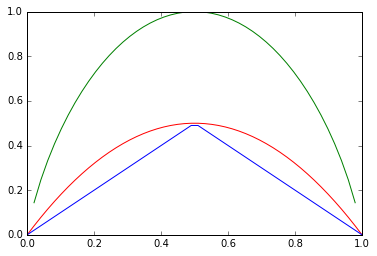

In [15]:
t = np.linspace(0,1)
gini = 1 - (t**2 + (1-t)**2)
classification = np.zeros(len(t))
count = 0
for i in t:
    
    classification[count] = 1 - max(i, 1-i)
    count = count + 1
entropy = - (t*np.log2(t)+ (1-t)*np.log2(1-t))
plt.plot(t, gini, 'r', t, classification, 'b', t, entropy, 'g')


## Gain

To determine how a test condition performs, we compare the degree of impurity of the parent nodes before splitting with the impurity of the child nodes after splitting (say some weighted average). The larger the difference, the better the test condition. 

The gain ($\Delta$) is a measure that can determine how good a split you are making; in a greedy algorithm like Hunts, you will choose a  test critera that has the best gain at any given step. 

If $I$ defines the impurity measure of our choice, and we split some parent node containing $N$ records into $k$ child nodes which each contain $N_j$ records in the node $j$, the gain of this splitting is given by:

$$\Delta = I_{\text{parent}}-\sum_{j=1}^k \frac{N_j}{N}I_j$$